# Euclid Astroquery library example notebook

<br>
<br>

<img style="position: absolute; right: 60px; top: 40px; height: 160px; width: 160px" src="https://datalabs.esa.int/datalab-icon/c11e47af-7ce9-4281-b3b5-475a180a256f" /> 

**Author(s):** Kristin Anett Remmelgas

**Last modified:** 14.03.2025

**Notebook summary**

[Euclid Astroquery](https://astroquery--3216.org.readthedocs.build/en/3216/esa/euclid/euclid.html) is a Python library that can be used to access Euclid data through the Euclid Science Archive System. This notebook presents examples of all available astroquery functions with parameter options and usage examples. Note that the Astroquery functions below **access all the data through the SAS archive**. However when working on ESA Datalabs you already have **direct access to the Q1 data volume** so the functions demonstrated below might not be the most optimal way. Instead of using the get_product, get_spectrum and get_cutout methods to download data, on Datalabs you can instead use the path of the data dirctly. This notebook covers the following topics and corresponding Astroquery functions:

1. Logging in 
2. Loading tables metadata
    * Load_tables - Load all public data tables metadata
    * Load_table - Load metadata for a specified table
3. Getting data products
    * Get_product_list - Get the list of products associated with a given observation id
    * Get_product - Download a product given its file name or product id
4. Cone search
    * Cone_search - Cone search for a given catalog and sky position, results sorted by distance
5. Making image cutouts
    * Get_cutout - Download a cutout given its file path, instrument and obs_id, and the cutout region
6. Launching jobs
    * Launch_job - Make a synchronous query
    * Launch_job_async - Make an asynchronous query
    * List_async_jobs - Return all the asynchronous jobs
7. Query objects
    * Query_object - Search for objects around a given position with the default catalog catalogue.mer_catalogue
8. Get spectra
    * Get_spectrum - Download a spectrum with datalink
    * Get_datalinks - Get datalinks associated to the provided identifiers
9. Logging out

Euclid astroquery is similar to the Gaia one so see here for more examples: https://astroquery.readthedocs.io/en/latest/gaia/gaia.html

**Useful links:**

* [Q1 data release homepage](https://www.cosmos.esa.int/en/web/euclid/euclid-q1-data-release)
* [Euclid Q1 data product description](https://euclid.esac.esa.int/dr/q1/dpdd/index.html)
* [Euclid Astroquery documentation](https://astroquery--3216.org.readthedocs.build/en/3216/esa/euclid/euclid.html)


**Running the notebook:** This notebook has **read-only permissions**. You can still run and edit cells but if you would like to save your changes then you have to save the notebook to a different location - your workspace for example. The notebook is intended to be run using the **EUCLID-TOOLS kernel** that has all the necessary packages included.

***

In [1]:
#installing necessary packages
from astroquery.esa.euclid.core import EuclidClass
from astropy import wcs
import pandas as pd
import astropy.units as u
from astropy.nddata.utils import Cutout2D
from astropy.coordinates import SkyCoord
from astroquery.simbad import Simbad

from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style, ImageNormalize, PercentileInterval, AsinhStretch, LogStretch
plt.style.use(astropy_mpl_style)
import os

First let's make a folder (if not already created) to save the output files from this notebook. All the example notebooks save their outputs to this same folder in your user workspace called: `'example_notebook_outputs/'`

In [3]:
#makeing a folder for the output files
output_folder= '/media/user/example_notebook_outputs/'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

Next step is choosing the archive environment you want to work with. We will be using the PDR environment which stands for "Public Data Release".

In [2]:
#choosing the archive envionment
Euclid = EuclidClass(environment='PDR')

### 1. login -  Perform a login 
In order to access propritary data hosted in the Euclid Science Archive users need to log in with the same LDAP credentials needed to access the data via the SAS archive interface. User and password can be used or a credential file that contains user name and password (2 lines: one for user name and the following one for the password)

| Input parameter | Type | Mandatory | Default | Description |
| --- | --- | --- | --- | --- |
| user | str | yes if 'file' is not provided | None | Login name
| password | str | yes if 'file' is not provided | None | User password
| credentials_file | str | yes if no 'user' & 'password' are provided | None | File containing user and password in two lines
| verbose | bool | no | False | Flag to display information about the process 

In [4]:
# various login options
# Euclid.login(user='yourusername')
# Euclid.login(user='yourusername', password='yourpassword')
Euclid.login(credentials_file='/media/user/cred.txt')

INFO: Login to Euclid TAP server: eas.esac.esa.int:443/tap-server/tap/ [astroquery.esa.euclid.core]
INFO: OK [astroquery.utils.tap.core]
INFO: Login to Euclid data service: eas.esac.esa.int:443/sas-dd/tap-server/ [astroquery.esa.euclid.core]
INFO: OK [astroquery.utils.tap.core]
INFO: Login to Euclid cutout service: eas.esac.esa.int:443/sas-cutout/tap-server/ [astroquery.esa.euclid.core]
INFO: OK [astroquery.utils.tap.core]


## 2. Loading tables

### 2.1 load_tables - Load all public data tables metadata

The method returns a list of table objects

| Input parameter | Type | Mandatory | Default | Description |
| --- | --- | --- | --- | --- |
| only_names | bool TAP+ only | no | False | True to load table names only 
| include_shared_tables | bool TAP+ only | no | False | True to include shared tables
| verbose | bool | no | False | Flag to display information about the process 

In [5]:
tables = Euclid.load_tables(only_names=True, include_shared_tables=True)
print("Found", len(tables), "tables")

for table in (tables):
    print(table.get_qualified_name())

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
Found 72 tables
ivoa.obscore
public.dual
sedm.raw_detector
sedm.raw_frame
sedm.raw_quadrant
sedm.aux_calibrated
sedm.aux_mosaic
sedm.aux_stacked
sedm.basic_download_data
sedm.calibrated_detectors
sedm.calibrated_frame
sedm.column_values
sedm.combined_spectra
sedm.combined_spectra_product
sedm.data_release
sedm.frame_catalog
sedm.instrument
sedm.mer_final_catalogue
sedm.mer_segmentation_map
sedm.mosaic_product
sedm.observation_mode
sedm.observation_mosaic
sedm.observation_stack
sedm.phz_catalogue
sedm.phz_catalogue_l3
sedm.provenance
sedm.sedm_production
sedm.sir_frame_detectors
sedm.sir_science_frame
sedm.spe_catalogue
sedm.spectra_source
sedm.vmpz_healpix_bitmask
sedm.vmpz_healpix_coverage
sedm.vmpz_healpix_depthmap
sedm.vmpz_healpix_footprint_mask
sedm.vmpz_healpix_infomap
sedm.files_table
tap_config.coord_sys
tap_config.properties
tap_sch

### 2.2 load_table - Load metadata for a specified table

If the user is logged in, the table can refer to a table in the user's private area. The method returns a tap table metadata object.

| Input parameter | Type | Mandatory | Default | Description |
| --- | --- | --- | --- | --- |
| table | str | yes| - | Full qualified table name (i.e. schema name + table name)
| verbose | bool | no | False | Flag to display information about the process 

In [6]:
#getting all columns for the sedm.calibrated_frame table
table = Euclid.load_table(table="sedm.calibrated_frame", verbose=False)

for column in table.columns:
    print(column.name)

calibrated_frame_oid
category
creation_date
datalabs_path
data_release_oid
dec
duration
end_time
field_id
file_checksum
file_name
file_path
filter_name
first_type
fov
frame_seq
instrument_name
observation_date_time_utc
observation_id
pa
patch_id
pointing_id
product_id
product_type
provenance_id
published
ra
release_date
release_name
second_type
start_time
start_time_mjd
stc_s
stype
technique
to_be_published


## 3. Getting products

The following Astroquery methods will be used:

* Get list of available products - **Euclid.get_product_list**

* Download product(s) with file name or product id - **Euclid.get_product**

### 3.1 get_product_list - Get the list of products of a given EUCLID id searching by observation_id or tile_index

In the following example we demonstrate the use of the Euclid.get_product_list method to get the list of products associated with a given EUCLID observation_id or tile_index.

The method returns a list of products as an astropy.table. The possible input arguments can be seen in the table below.

| Input parameter | Type | Mandatory | Default | Description |
| --- | --- | --- | --- | --- |
| observation_id | str | yes | - | Observation id for observations. It is not compatible with parameter tile_index
| tile_index | str | yes | - | Tile index for products searchable by tile. It is not compatible with parameter observation_id
| product_type | str| yes | None | List only products of the given type
| verbose | bool | no | False | Flag to display information about the process 

In order to see which products can be found by observation_id and which by tile_index we can view the full function documentation by running `help(Euclid.get_product_list)` in the cell below.

In [7]:
help(Euclid.get_product_list)

Help on method get_product_list in module astroquery.esa.euclid.core:

get_product_list(*, observation_id=None, tile_index=None, product_type, verbose=False) method of astroquery.esa.euclid.core.EuclidClass instance
    Description
    -----------
    Get the list of products of a given EUCLID id searching by observation_id or tile_index.
    
    Parameters
    ----------
    observation_id : str, mandatory
        observation id for observations. It is not compatible with parameter tile_index.
    
        Searchable products by observation_id: 'dpdVisRawFrame', 'dpdNispRawFrame',
        ,'DpdVisCalibratedQuadFrame','DpdVisCalibratedFrameCatalog', 'DpdVisStackedFrame',
        'DpdVisStackedFrameCatalog',
        'DpdNirCalibratedFrame', 'DpdNirCalibratedFrameCatalog', 'DpdNirStackedFrameCatalog', 'DpdNirStackedFrame',
        'DpdMerSegmentationMap', 'dpdMerFinalCatalog',
        'dpdPhzPfOutputCatalog', 'dpdPhzPfOutputForL3',
        'dpdSpePfOutputCatalog',
        'dpdSheLensMcC

In [8]:
# product_list_results = Euclid.get_product_list(id="102018211", schema='sedm', product_type="mosaic")
product_list_results = Euclid.get_product_list(observation_id=2682, product_type='DpdVisCalibratedQuadFrame')
print("Found", len(product_list_results), "results")

#showing the first 5 rows of the dataframe
product_list_results[:5]

Found 6 results


file_name,calibrated_frame_oid,observation_id,instrument_name,filter_name,ra,dec,stc_s,start_time,end_time,duration
,,,,,deg,deg,,,,
str255,int64,str255,str255,str255,float64,float64,object,object,object,float64
EUC_VIS_SWL-DET-002682-01-1-0000000__20241017T045252.414718Z.fits,2372,2682,VIS,VIS,266.83780221,67.81421706,Polygon J2000 265.5929898804106 67.91734271054418 265.59326714062973 67.91741466882824 265.71891881676197 67.94996160069076 265.75838371823534 67.96013066365252 265.8847954915905 67.99246343702256 266.01197491224775 68.02474194200225 266.1795435460962 68.06683943242663 266.3475087448397 68.10893797020218 266.47622039888824 68.14077832457662 266.60506701024246 68.17240303837953 266.64562255537237 68.18231764221444 266.77501365601063 68.21373150055261 266.9050540655026 68.24506188191542 267.0759740916335 68.28564685825026 267.2068303754522 68.31659045837387 267.37762811323125 68.21982436844702 267.4599950025125 68.1725923779173 267.54212826087405 68.12523440526358 267.71661559664045 68.02407506533035 267.79809963001895 67.97628537587255 267.879388227869 67.92834509234795 267.96527569930873 67.8773142194498 268.05117684929024 67.82610598440411 268.1315770645182 67.77781174183514 268.2117457700775 67.72939273286016 266.4849074679662 67.30513427391482 265.46786628523756 67.88468409953131,2024-07-17T17:38:07.421,2024-07-17T17:47:27.941,560.52
EUC_VIS_SWL-DET-002682-02-1-0000000__20241017T045249.829187Z.fits,2364,2682,VIS,VIS,266.90616911,67.83109026,Polygon J2000 265.66053772833 67.93459134736156 265.6608154026911 67.93466319220845 265.78665472401667 67.96715867379856 265.8261784659348 67.97731156007781 265.9527782010324 68.00959246237367 266.08014627496203 68.0418186970947 266.24796262732804 68.08384718897912 266.4161763147806 68.12587641866355 266.5450774540703 68.15766356375153 266.6741132717084 68.1892349270853 266.7147283068139 68.19913272077383 266.8443087220236 68.23049289063292 266.974538924735 68.26176922792507 267.145706982793 68.3022830400587 267.2767530503346 68.33317205667711 267.4473794523036 68.23633467273105 267.5296622659102 68.18906824864216 267.6117110843928 68.14167590634037 267.78601799725703 68.04044343834398 267.8674164234311 67.99261954699807 267.9486190218806 67.94464511084415 268.03441471774585 67.8935781177069 268.12022380176103 67.84233372020189 268.2005369742264 67.79400559809423 268.2806183148134 67.74555277552608 266.55136312222237 67.32201637388997 265.53522684862634 67.90198388771903,2024-07-17T17:55:53.421,2024-07-17T18:05:13.941,560.52
EUC_VIS_SWL-DET-002682-01-2-0000000__20241017T045248.893163Z.fits,2367,2682,VIS,VIS,266.83780221,67.81421706,Polygon J2000 265.59362783486625 67.91761986756214 265.59390510171085 67.91769182403952 265.7195597792771 67.95023793639737 265.75902562193613 67.96040674169288 265.8854404019177 67.99273868883908 266.01262284034897 68.02501636122439 266.1801954369468 68.06711275257601 266.3481646108415 68.10921018633019 266.476879296274 68.14104969310817 266.60572893464 68.17267355705309 266.6462854315358 68.18258789310451 266.775679561041 68.21400089618346 266.9057230071472 68.24533041660989 267.0766470018778 68.28591425925815 267.2075063223754 68.31685698982183 267.3783013501671 68.22008976268806 267.46066690939927 68.17285722289945 267.5427988318356 68.12549870200026 267.717283312847 68.02433819555226 267.79876599147804 67.97654796050645 267.88005322826285 67.92860713217367 267.9659392470732 67.87757568307265 268.0518389397455 67.82636687114505 268.1322377770379 67.77807208810589 268.212405099455 67.72965253970708 266.4855281252496 67.30540558442742 265.4685012441121 67.88496207128105,2024-07-17T17:52:50.421,2024-07-17T17:54:19.941,89.52
EUC_VIS_SWL-DET-002682-03-1-0000000__20241017T045258.501982Z.fits,2360,2682,VIS,VIS,266.99914906,67.83373562,Polygon J2000 265.7543135066661 67.93791777664441 265.7545915102283 67.93798946340875 265.88057978243825 67.9704132955775 265.9201500985328 67.98054367492874 266.0468980628338 68.01275247452034 266.17441427138965 68.0

### 3.2 get_product - Download a product given its file name or product id

In the following example we demonstrate the use of the Euclid.get_product method to DOWNLOAD a specific product from the archive and to display it using Matplotlib. 

The method downloads the fits file(s) and returns the local path where the product(s) are saved

Note that when running this notebook on ESA Datalabs you have access to all the products directly through the data volume and don't need to download them - this method is an alternative for working outside ESA Datalabs or accessing data that is not in a data volume.

| Input parameter | Type | Mandatory | Default | Description |
| --- | --- | --- | --- | --- |
| file_name | str | yes if no product_id | None | File name for the product. More than one can be specified between comma
| product_id | str | yes if no file_name | None | Product id. More than one can be specified between comma
| schema | str| no |'sedm' | The data release name (schema) in which the product should be searched
| output_file | str | no | temporary file name is created | Output file, use zip extension when downloading multiple files
| verbose | bool | no | False | Flag to display information about the process 

In [9]:
example_file_name = "EUC_NIR_W-CAL-IMAGE_H-2706-2_20240930T183047.074521Z.fits"
print("Getting file:", example_file_name)
path = Euclid.get_product(file_name=example_file_name, output_file=output_folder + example_file_name)

Getting file: EUC_NIR_W-CAL-IMAGE_H-2706-2_20240930T183047.074521Z.fits


Filename: /media/user/example_notebook_outputs/EUC_NIR_W-CAL-IMAGE_H-2706-2_20240930T183047.074521Z.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     114   ()      
  1  DET11.SCI     1 ImageHDU        91   (2040, 2040)   float32   
  2  DET11.RMS     1 ImageHDU        41   (2040, 2040)   float32   
  3  DET11.DQ      1 ImageHDU        68   (2040, 2040)   int32 (rescales to uint32)   
  4  DET21.SCI     1 ImageHDU        91   (2040, 2040)   float32   
  5  DET21.RMS     1 ImageHDU        41   (2040, 2040)   float32   
  6  DET21.DQ      1 ImageHDU        68   (2040, 2040)   int32 (rescales to uint32)   
  7  DET31.SCI     1 ImageHDU        91   (2040, 2040)   float32   
  8  DET31.RMS     1 ImageHDU        41   (2040, 2040)   float32   
  9  DET31.DQ      1 ImageHDU        68   (2040, 2040)   int32 (rescales to uint32)   
 10  DET41.SCI     1 ImageHDU        91   (2040, 2040)   float32   
 11  DET41.RMS     1 ImageHDU        41   (20

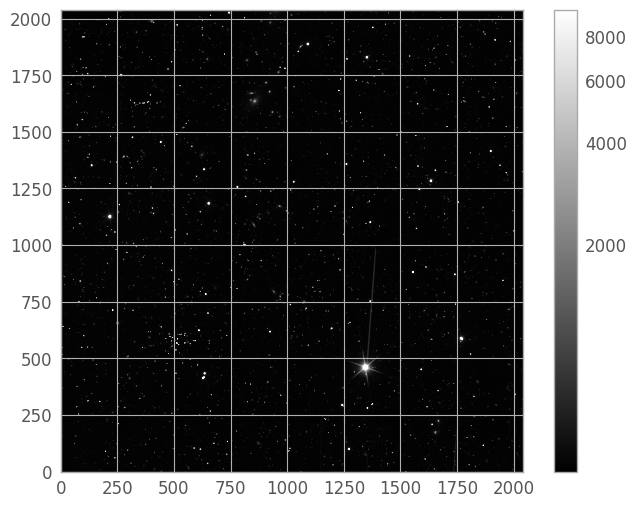

In [10]:
#display the downloaded product (since this is a calibrated frame the different detectors are stored as different extensions - we are displaying only one extension)
hdul = fits.open(path[0])
print(fits.info(path[0]))
image_data = hdul[1].data

plt.figure()
plt.imshow(image_data, cmap='gray', origin='lower', norm=ImageNormalize(image_data, interval=PercentileInterval(99.9), stretch=AsinhStretch()))
colorbar = plt.colorbar()

## 4. Cone search

### 4.1 cone_search - Cone search for a given catalog and sky position, results sorted by distance

This query performs a cone search centered at the specified ra/dec coordinates with the provided radius argument. In the example use case below we perform a cone search around the NGC6505 galaxy location.

The method returns a job object

| Input parameter | Type | Mandatory | Default | Description |
| --- | --- | --- | --- | --- |
| coordinate | astropy.coordinate| yes | - |Coordinates center point |
| radius | astropy.units | yes | - |Radius |
| table_name | str | no | 'catalogue.mer_catalogue' | Table to search |
| ra_column_name | str | no | 'right_ascension' | Name of the RA column in the table |
| dec_column_name | str | no |'declination' | Name of the DEC column in the table |
| async_job | bool | no | False | Executes the job in asynchronous/synchronous mode | 
| background | bool | no | False | When the job is executed in asynchronous mode, this flag specifies whether the execution will wait until results are available |
| dump_to_file | bool | no | False | If True, the results are saved in a file instead of using memory |
| output_file | str | no | None | File name where the results are saved if dump_to_file is True. If this parameter is not provided, the job id is used instead |
| output_format | str | no | 'csv' | Output format for the output file |
| verbose | bool | no | False | Flag to display information about the process | 
| columns | list of strings | no | [] | Display only the selected columns by providing their names or set "*" to display all the available columns.


In [11]:
#example cone search for source NGC6505

simbad_out = Simbad.query_object('NGC6505')
ra_gal = simbad_out['ra'][0]
dec_gal = simbad_out['dec'][0]

coord_ngc6505 = SkyCoord(ra_gal, dec_gal, frame='icrs', unit='deg')
radius = u.Quantity(0.5, u.deg)
j = Euclid.cone_search(
    coordinate=coord_ngc6505, 
    radius=radius, 
    table_name="sedm.mosaic_product", 
    ra_column_name="ra", 
    dec_column_name="dec", 
    columns="*", async_job=True)

cone_results = j.get_results()
print("Found", len(cone_results), "results")
cone_results['tile_index', 'creation_date', 'ra', 'dec', 'file_name', 'file_path', 'datalabs_path', 'filter_name', 'dist'][:5]

INFO: Query finished. [astroquery.utils.tap.core]
Found 27 results


tile_index,creation_date,ra,dec,file_name,file_path,datalabs_path,filter_name,dist
int64,str23,float64,float64,str88,str55,str43,str11,float64
102158889,2024-10-26T14:01:21.038,267.3807789,65.4983,EUC_MER_BGSUB-MOSAIC-CFIS-R_TILE102158889-4366B7_20241024T203624.450577Z_00.00.fits,/euclid/repository_idr/iqr1/Q1_R1/MER/102158889/MEGACAM,/data/euclid_q1/Q1_R1/MER/102158889/MEGACAM,MEGACAM_r,0.16896769830835442
102158889,2024-10-26T13:50:13.676,267.3807789,65.4983,EUC_MER_BGSUB-MOSAIC-WISHES-G_TILE102158889-3DC3C3_20241024T205647.635112Z_00.00.fits,/euclid/repository_idr/iqr1/Q1_R1/MER/102158889/HSC,/data/euclid_q1/Q1_R1/MER/102158889/HSC,HSC_g,0.16896769830835442
102158889,2024-10-26T13:37:09.628,267.3807789,65.4983,EUC_MER_BGSUB-MOSAIC-NIR-Y_TILE102158889-AC6585_20241024T225321.344048Z_00.00.fits,/euclid/repository_idr/iqr1/Q1_R1/MER/102158889/NISP,/data/euclid_q1/Q1_R1/MER/102158889/NISP,NIR_Y,0.16896769830835442
102158889,2024-10-26T14:05:09.98,267.3807789,65.4983,EUC_MER_BGSUB-MOSAIC-CFIS-U_TILE102158889-9E97F_20241024T204431.839748Z_00.00.fits,/euclid/repository_idr/iqr1/Q1_R1/MER/102158889/MEGACAM,/data/euclid_q1/Q1_R1/MER/102158889/MEGACAM,MEGACAM_u,0.16896769830835442
102158889,2024-10-26T13:10:32.453,267.3807789,65.4983,EUC_MER_BGSUB-MOSAIC-NIR-H_TILE102158889-ED035A_20241024T212936.705156Z_00.00.fits,/euclid/repository_idr/iqr1/Q1_R1/MER/102158889/NISP,/data/euclid_q1/Q1_R1/MER/102158889/NISP,NIR_H,0.16896769830835442


Here is an example of the ADQL query that was executed in the backend when calling this method with the example parameters above:

```
SELECT TOP 50 *, DISTANCE( POINT('ICRS', ra, dec), POINT('ICRS', 267.78083367365025, 65.53078320352917) ) AS dist 
FROM sedm.mosaic_product 
WHERE 1 = CONTAINS( POINT('ICRS', ra, dec), CIRCLE('ICRS', 267.78083367365025, 65.53078320352917, 0.5) ) 
ORDER BY dist ASC
```

### Accessing a file on ESA Datalabs directly  

Using the file_name and the datalabs_path columns from the cone search result table it is possible to build the path to the product. This will allow to read the contents of the file within ESA Datalabs notebooks without the need to use get_product to download the data.

In [12]:
filename= str(cone_results[4]["file_name"])
filename

'EUC_MER_BGSUB-MOSAIC-NIR-H_TILE102158889-ED035A_20241024T212936.705156Z_00.00.fits'

In [13]:
path_to_file = str(cone_results[4]["datalabs_path"]) 
path_to_file

'/data/euclid_q1/Q1_R1/MER/102158889/NISP'

In [14]:
full_path_to_file = path_to_file + '/' + filename
full_path_to_file

'/data/euclid_q1/Q1_R1/MER/102158889/NISP/EUC_MER_BGSUB-MOSAIC-NIR-H_TILE102158889-ED035A_20241024T212936.705156Z_00.00.fits'

In [15]:
hdul = fits.open(full_path_to_file)
print(fits.info(full_path_to_file))
image_data = hdul[0].data
header = hdul[0].header

Filename: /data/euclid_q1/Q1_R1/MER/102158889/NISP/EUC_MER_BGSUB-MOSAIC-NIR-H_TILE102158889-ED035A_20241024T212936.705156Z_00.00.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      48   (19200, 19440)   float32   
None


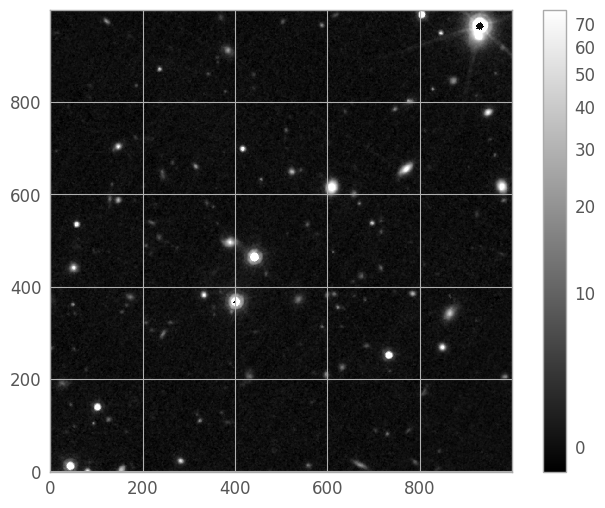

In [16]:
plt.imshow(image_data[0:1000,0:1000], interpolation='nearest', cmap='gray', origin='lower', norm=ImageNormalize(image_data, interval=PercentileInterval(99.5), stretch=AsinhStretch()))
plt.colorbar();

## 5. Making cutouts

### 5.1 get_cutout - Download a cutout given its file path, instrument and obs_id, and the cutout region

The method downloads the fits file of the cutout and returns a list containing the local path where the cutout is saved.

**Note:** This method uses the astroquery cutout service for making the cutout which means the file is accessed through the archive. Since Q1 is availvable as a volume on Datalabs it is also alternatively possible (and probably faster) to make the cutout directly in this notebook (using astropy function Cutout2D for example) accessing the data through the volume instead (see example below). See the Q1_cutouts notebook for more.

| Input parameter | Type | Mandatory | Default | Description |
| --- | --- | --- | --- | --- |
| file_path | str | yes | None | File path for the product on the server
| instrument | str | yes | None | Instrument for the product, can be 'VIS' or 'NISP'
| id | str | yes | None | The observation id or tile index for MER products
| coordinate | astropy.coordinate | yes | - | Coordinates center point
| radius | astropy.units | yes | - | The radius of the cutout to generate
| output_file | str | no | temporary file name is created | Path/name for the output file, use zip extension when downloading multiple files. Will create folders that didn't exist before

In [17]:
#make simple cutout for the same source as the cone search. Using the file name and path from the cone search results (vis file)

#choosing a VIS file to make cutout from the cone search results
example_file = cone_results[cone_results['instrument_name'] == 'VIS'][0]

# getting the arguments from the cone search result table automatically
saved_cutout_filepath = Euclid.get_cutout(
    file_path=example_file["file_path"] + "/" + example_file["file_name"],
    instrument=example_file["instrument_name"],
    id=example_file["tile_index"],
    coordinate=coord_ngc6505,
    radius= 0.2 * u.arcmin,
    output_file=output_folder + 'cutouts/astroquery_cutout_example.fits')

# below is the equivalent version but showing all arguments (for clarity)
# saved_cutout_filepath = Euclid.get_cutout(
#     file_path="/data_03/repository_otf/MER/101158889/VIS/EUC_MER_BGSUB-MOSAIC-VIS_TILE101158889-D08FBD_20240113T021028.995617Z_00.00.fits", 
#     instrument="VIS", 
#     id="101158889", 
#     coordinate= SkyCoord("17h51m07.4s +65d31m50.8s", frame='icrs'),
#     radius=0.2 * u.arcmin, 
#     output_file='outputs/test_cutout_example.fits')

print("Cutout saved at", saved_cutout_filepath)

Cutout saved at ['/media/user/example_notebook_outputs/cutouts/astroquery_cutout_example.fits']


In [29]:
# alternatively making the same cutout in ESA Datalabs directly
# path_in_datalabs = example_file["datalabs_path"] + "/" + example_file["file_name"]
# hdul = fits.open(path_in_datalabs)
# cutout = Cutout2D(data=hdul[0].data, position = coord_ngc6505, size= 0.2 * u.arcmin, wcs=wcs.WCS(header))

**Visualizing the cutout we made using Matplotlib and the astropy.visualization package to add a percentile interval and image stretching**

Filename: /media/user/example_notebook_outputs/cutouts/astroquery_cutout_example.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   (241, 241)   float32   
None


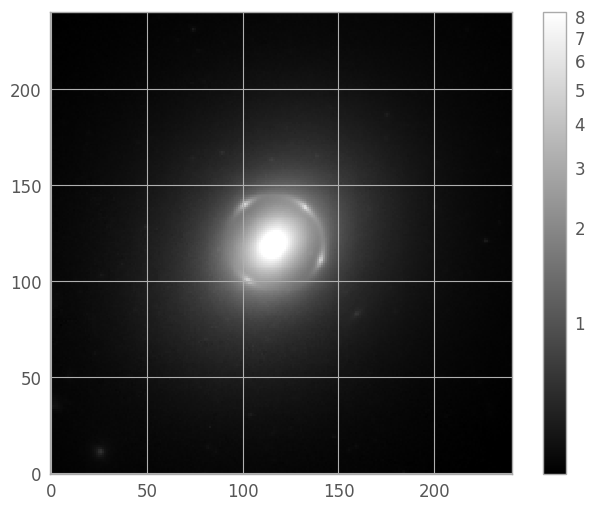

In [19]:
#looking at the cutout we made
hdul = fits.open(saved_cutout_filepath[0])
print(fits.info(saved_cutout_filepath[0]))
image_data = hdul[0].data

plt.imshow(image_data, interpolation='nearest', cmap='gray', origin='lower', norm=ImageNormalize(image_data, interval=PercentileInterval(99.5), stretch=AsinhStretch()))
plt.colorbar();

## 6. Launching jobs

### 6.1 launch_job - make a synchronous query

The results of a synchronous query are stored at the user side (i.e., saved in a variable in this notebook or in a file but not saved in the server/archive). These queries must be used when the amount of data to be retrieved (number of rows) is small, otherwise, a timeout error can be raised (an error created because the execution time of the query exceeds time execution limit). The output of the synchronous queries is limited to 2000 rows. If you need more than that, you must use asynchronous queries. The results of asynchronous queries can be saved in memory (default) or in a file but is also stored on the server/archive so you can access the results by logging in on the archive website too.

The method returns a Job object

| Input parameter | Type | Mandatory | Default | Description |
| --- | --- | --- | --- | --- |
| query | str | yes | - | Query to be executed
| dump_to_file | bool | no | False | If True, the results are saved in a file instead of using memory
| output_file | str | no | None | File name where the results are saved if dump_to_file is True. If this parameter is not provided, the jobid is used instead
| output_format | str| no | 'csv'| Format of the results for the output file
| verbose | bool | no | False | Flag to display information about the process 
| upload_resource | str | no | None | Resource to be uploaded to UPLOAD_SCHEMA
| upload_table_name | str | required if uploadResource is provided | None | Resource temporary table name associated to the uploaded resource

In [20]:
# example synchronous query
# query content: getting some sources from the mer catalogue

job = Euclid.launch_job("SELECT right_ascension, declination, segmentation_area, fluxerr_vis_1fwhm_aper, ellipticity, kron_radius \
FROM catalogue.mer_catalogue  \
WHERE ellipticity > 0 \
ORDER BY ellipticity ASC")

source_results_table = job.get_results()
print("Found", len(source_results_table), " query results")
print("The results table includes the following", len(source_results_table.colnames), "columns: ", source_results_table.colnames)

source_results_table[:15]

Found 2000  query results
The results table includes the following 6 columns:  ['right_ascension', 'declination', 'segmentation_area', 'fluxerr_vis_1fwhm_aper', 'ellipticity', 'kron_radius']


right_ascension,declination,segmentation_area,fluxerr_vis_1fwhm_aper,ellipticity,kron_radius
float64,float64,int64,float64,float64,float64
60.3372780005097,-49.93184727724773,45,0.024313488975167274,1.1569118214538321e-05,10.145233154296875
59.92581284609097,-48.117835930359156,165,0.035201895982027054,4.3500345782376826e-05,10.814051628112793
62.91963955425831,-45.60370330289406,43783,nan,5.609192521660589e-05,884.3989868164062
54.38946012012026,-28.843720993232775,213,0.03697587549686432,6.897230923641473e-05,11.36937141418457
267.3583266451287,63.994872950197674,31,0.01883346401154995,8.067921589827165e-05,10.564066886901855
52.507667893100944,-29.445192357858655,44,0.020872678607702255,0.00010451683920109645,10.120616912841797
61.43102565450044,-48.13296805386111,53,0.023762457072734833,0.00010995510092470795,10.149212837219238
274.03172675714404,65.86352270374569,134,0.03499231114983559,0.00011172338417964056,10.804966926574707
271.4749139468259,68.66799925831447,725,0.07235158979892731,0.00013952785229776055,15.325024604797363


### 6.2. launch_job_async - Make an asynchronous query

Asynchronous queries save all results at server side which means they take up the user's file quota on the archive. These queries can be accessed at any time on the archive website. For anonymous users, results are kept for three days. For authenticated users the asynchronous results are kept at server side forever (until the user decides to remove them). Make sure to delete the results you don't need anymore every once in a while to make sure you don't reach the archive user quota. When that happens all future jobs/queries will start failing. You can delete the jobs on the archive website (and soon through Python too).

The method returns a Job object

| Input parameter | Type | Mandatory | Default | Description |
| --- | --- | --- | --- | --- |
| query | str | yes | - | Query to be executed
| dump_to_file | bool | no | False | If True, the results are saved in a file instead of using memory
| output_file | str | no | None | File name where the results are saved if dump_to_file is True. If this parameter is not provided, the jobid is used instead
| output_format | str| no | 'csv'| Format of the results for the output file
| verbose | bool | no | False | Flag to display information about the process 
| background | bool | no | False | When the job is executed in asynchronous mode, this flag specifies whether the execution will wait until * results are available 
| upload_resource | str | no | None | Resource to be uploaded to UPLOAD_SCHEMA
| upload_table_name | str | required if uploadResource is provided | None | Resource temporary table name associated to the uploaded resource

In [21]:
# example asynchronous query with saving results to file
# query content: getting the mosaic file name corresponding to the first source in the last query

source_0 = source_results_table[0] #first row of result table
query = "SELECT file_name, file_path, datalabs_path, mosaic_product_oid, tile_index, instrument_name, filter_name, ra, dec \
        FROM sedm.mosaic_product \
        WHERE (instrument_name='VIS') AND (((mosaic_product.fov IS NOT NULL AND INTERSECTS(CIRCLE('ICRS'," + str(source_0["right_ascension"]) + "," + str(source_0["declination"])+","+ str(0.5/60) +"), mosaic_product.fov)=1))) \
        ORDER BY mosaic_product.tile_index ASC"
job_async = Euclid.launch_job_async(query, dump_to_file=True, output_file=output_folder + "async_result.csv", output_format="csv", verbose=False)
print("Started async job with id:", job_async.jobid)

#to check on the status of the async job
print(job_async)

mosaic_file_results_table = job_async.get_results()
print("Found", len(mosaic_file_results_table), " query results")
mosaic_file_results_table

Started async job with id: 1742224381428TPDR
Jobid: 1742224381428TPDR
Phase: COMPLETED
Owner: None
Output file: /media/user/example_notebook_outputs/async_result.csv
Results: None
Found 1  query results


file_name,file_path,datalabs_path,mosaic_product_oid,tile_index,instrument_name,filter_name,ra,dec
str80,str51,str39,int64,int64,str3,str3,float64,float64
EUC_MER_BGSUB-MOSAIC-VIS_TILE102019591-BDF6EF_20241018T164804.324145Z_00.00.fits,/euclid/repository_idr/iqr1/Q1_R1/MER/102019591/VIS,/data/euclid_q1/Q1_R1/MER/102019591/VIS,1081,102019591,VIS,VIS,60.0509927,-50.0


### 6.3. list_async_jobs - Returns all the asynchronous jobs

The method returns a list of Job objects

| Input parameter | Type | Mandatory | Default | Description |
| --- | --- | --- | --- | --- |
| verbose | bool | no | False | Flag to display information about the process

In [22]:
#list all your async jobs
joblist = Euclid.list_async_jobs()
for j in joblist: 
    print(j, "\n")

Jobid: 1742224381428TPDR
Phase: COMPLETED
Owner: None
Output file: None
Results: None 

Jobid: 1742224365765TPDR
Phase: COMPLETED
Owner: None
Output file: None
Results: None 

Jobid: 1742223837543TPDR
Phase: COMPLETED
Owner: None
Output file: None
Results: None 

Jobid: 1742223836667TPDR
Phase: COMPLETED
Owner: None
Output file: None
Results: None 

Jobid: 1742222873732TPDR
Phase: COMPLETED
Owner: None
Output file: None
Results: None 

Jobid: 1742222584531TPDR
Phase: COMPLETED
Owner: None
Output file: None
Results: None 

Jobid: 1742222573731TPDR
Phase: COMPLETED
Owner: None
Output file: None
Results: None 

Jobid: 1742222571424TPDR
Phase: COMPLETED
Owner: None
Output file: None
Results: None 

Jobid: 1742222565430TPDR
Phase: COMPLETED
Owner: None
Output file: None
Results: None 

Jobid: 1742222561404TPDR
Phase: COMPLETED
Owner: None
Output file: None
Results: None 

Jobid: 1742222560014TPDR
Phase: COMPLETED
Owner: None
Output file: None
Results: None 

Jobid: 1742222245295TPDR
Phase: 

## 7. Query objects
### 7.1 query_object - Search for objects around a given position with the default catalog catalogue.mer_catalogue

This query searches for all the objects contained in an arbitrary rectangular projection of the sky. Synchronous queries like this one return a limited number of rows -> 2000
 
The method returns the job results as astropy.table

| Input parameter | Type | Mandatory | Default | Description |
| --- | --- | --- | --- | --- |
| coordinate | astropy.coordinate| yes | - |Coordinates center point |
| radius | astropy.units | yes if no 'width' nor 'height' are provided | - | radius (deg)
| width | astropy.units | yes if no 'radius' is provided | - | box width
| height | astropy.units | yes if no 'radius' is provided | - | box height
| verbose | bool | no | False | Flag to display information about the process

In [23]:
# using a source from the "launch_job" section result table
example_source = source_results_table[0]
example_source

right_ascension,declination,segmentation_area,fluxerr_vis_1fwhm_aper,ellipticity,kron_radius
float64,float64,int64,float64,float64,float64
60.3372780005097,-49.93184727724773,45,0.024313488975167274,1.1569118214538321e-05,10.145233154296875


In [24]:
coord = SkyCoord(ra=example_source["right_ascension"], dec=example_source["declination"], unit=(u.degree, u.degree), frame='icrs')
coord

<SkyCoord (ICRS): (ra, dec) in deg
    (60.337278, -49.93184728)>

In [25]:
table = Euclid.query_object(coordinate=coord, width=u.Quantity(0.1, u.deg), height= u.Quantity(0.1, u.deg))
print("Found a total of", len(table), "query results")
table

Found a total of 2000 query results


dist,basic_download_data_oid,to_be_published,object_id,right_ascension,declination,right_ascension_psf_fitting,declination_psf_fitting,segmentation_map_id,vis_det,flux_vis_1fwhm_aper,flux_vis_2fwhm_aper,flux_vis_3fwhm_aper,flux_vis_4fwhm_aper,flux_y_1fwhm_aper,flux_y_2fwhm_aper,flux_y_3fwhm_aper,flux_y_4fwhm_aper,flux_j_1fwhm_aper,flux_j_2fwhm_aper,flux_j_3fwhm_aper,flux_j_4fwhm_aper,flux_h_1fwhm_aper,flux_h_2fwhm_aper,flux_h_3fwhm_aper,flux_h_4fwhm_aper,flux_nir_stack_1fwhm_aper,flux_nir_stack_2fwhm_aper,flux_nir_stack_3fwhm_aper,flux_nir_stack_4fwhm_aper,flux_u_ext_decam_1fwhm_aper,flux_u_ext_decam_2fwhm_aper,flux_u_ext_decam_3fwhm_aper,flux_u_ext_decam_4fwhm_aper,flux_g_ext_decam_1fwhm_aper,flux_g_ext_decam_2fwhm_aper,flux_g_ext_decam_3fwhm_aper,flux_g_ext_decam_4fwhm_aper,flux_r_ext_decam_1fwhm_aper,flux_r_ext_decam_2fwhm_aper,flux_r_ext_decam_3fwhm_aper,flux_r_ext_decam_4fwhm_aper,flux_i_ext_decam_1fwhm_aper,flux_i_ext_decam_2fwhm_aper,flux_i_ext_decam_3fwhm_aper,flux_i_ext_decam_4fwhm_aper,flux_z_ext_decam_1fwhm_aper,flux_z_ext_decam_2fwhm_aper,flux_z_ext_decam_3fwhm_aper,flux_z_ext_decam_4fwhm_aper,flux_u_ext_lsst_1fwhm_aper,flux_u_ext_lsst_2fwhm_aper,flux_u_ext_lsst_3fwhm_aper,flux_u_ext_lsst_4fwhm_aper,flux_g_ext_lsst_1fwhm_aper,flux_g_ext_lsst_2fwhm_aper,flux_g_ext_lsst_3fwhm_aper,flux_g_ext_lsst_4fwhm_aper,flux_r_ext_lsst_1fwhm_aper,flux_r_ext_lsst_2fwhm_aper,flux_r_ext_lsst_3fwhm_aper,flux_r_ext_lsst_4fwhm_aper,flux_i_ext_lsst_1fwhm_aper,flux_i_ext_lsst_2fwhm_aper,flux_i_ext_lsst_3fwhm_aper,flux_i_ext_lsst_4fwhm_aper,flux_z_ext_lsst_1fwhm_aper,flux_z_ext_lsst_2fwhm_aper,flux_z_ext_lsst_3fwhm_aper,flux_z_ext_lsst_4fwhm_aper,flux_u_ext_megacam_1fwhm_aper,flux_u_ext_megacam_2fwhm_aper,flux_u_ext_megacam_3fwhm_aper,flux_u_ext_megacam_4fwhm_aper,flux_r_ext_megacam_1fwhm_aper,flux_r_ext_megacam_2fwhm_aper,flux_r_ext_megacam_3fwhm_aper,flux_r_ext_megacam_4fwhm_aper,flux_g_ext_jpcam_1fwhm_aper,flux_g_ext_jpcam_2fwhm_aper,flux_g_ext_jpcam_3fwhm_aper,flux_g_ext_jpcam_4fwhm_aper,flux_i_ext_panstarrs_1fwhm_aper,flux_i_ext_panstarrs_2fwhm_aper,flux_i_ext_panstarrs_3fwhm_aper,flux_i_ext_panstarrs_4fwhm_aper,flux_z_ext_panstarrs_1fwhm_aper,flux_z_ext_panstarrs_2fwhm_aper,flux_z_ext_panstarrs_3fwhm_aper,flux_z_ext_panstarrs_4fwhm_aper,flux_g_ext_hsc_1fwhm_aper,flux_g_ext_hsc_2fwhm_aper,flux_g_ext_hsc_3fwhm_aper,flux_g_ext_hsc_4fwhm_aper,flux_z_ext_hsc_1fwhm_aper,flux_z_ext_hsc_2fwhm_aper,flux_z_ext_hsc_3fwhm_aper,flux_z_ext_hsc_4fwhm_aper,fluxerr_vis_1fwhm_aper,fluxerr_vis_2fwhm_aper,fluxerr_vis_3fwhm_aper,fluxerr_vis_4fwhm_aper,fluxerr_y_1fwhm_aper,fluxerr_y_2fwhm_aper,fluxerr_y_3fwhm_aper,fluxerr_y_4fwhm_aper,fluxerr_j_1fwhm_aper,fluxerr_j_2fwhm_aper,fluxerr_j_3fwhm_aper,fluxerr_j_4fwhm_aper,fluxerr_h_1fwhm_aper,fluxerr_h_2fwhm_aper,fluxerr_h_3fwhm_aper,fluxerr_h_4fwhm_aper,fluxerr_nir_stack_1fwhm_aper,fluxerr_nir_stack_2fwhm_aper,fluxerr_nir_stack_3fwhm_aper,fluxerr_nir_stack_4fwhm_aper,fluxerr_u_ext_decam_1fwhm_aper,fluxerr_u_ext_decam_2fwhm_aper,fluxerr_u_ext_decam_3fwhm_aper,fluxerr_u_ext_decam_4fwhm_aper,fluxerr_g_ext_decam_1fwhm_aper,fluxerr_g_ext_decam_2fwhm_aper,fluxerr_g_ext_decam_3fwhm_aper,fluxerr_g_ext_decam_4fwhm_aper,fluxerr_r_ext_decam_1fwhm_aper,fluxerr_r_ext_decam_2fwhm_aper,fluxerr_r_ext_decam_3fwhm_aper,fluxerr_r_ext_decam_4fwhm_aper,fluxerr_i_ext_decam_1fwhm_aper,fluxerr_i_ext_decam_2fwhm_aper,fluxerr_i_ext_decam_3fwhm_aper,fluxerr_i_ext_decam_4fwhm_aper,fluxerr_z_ext_decam_1fwhm_aper,fluxerr_z_ext_decam_2fwhm_aper,fluxerr_z_ext_decam_3fwhm_aper,fluxerr_z_ext_decam_4fwhm_aper,fluxerr_u_ext_lsst_1fwhm_aper,fluxerr_u_ext_lsst_2fwhm_aper,fluxerr_u_ext_lsst_3fwhm_aper,fluxerr_u_ext_lsst_4fwhm_aper,fluxerr_g_ext_lsst_1fwhm_aper,fluxerr_g_ext_lsst_2fwhm_aper,fluxerr_g_ext_lsst_3fwhm_aper,fluxerr_g_ext_lsst_4fwhm_aper,fluxerr_r_ext_lsst_1fwhm_aper,fluxerr_r_ext_lsst_2fwhm_aper,fluxerr_r_ext_lsst_3fwhm_aper,fluxerr_r_ext_lsst_4fwhm_aper,fluxerr_i_ext_lsst_1fwhm_aper,fluxerr_i_ext_lsst_2fwhm_aper,fluxerr_i_ext_lsst_3f

## 8. Get spectra
### 8.1 Get_spectrum - Downloads a spectrum with datalink.
    
The spectrum associated with the source_id is downloaded as a compressed FITS file, and the files it contains are returned in a list. The compressed fits file is saved in the local path given by output_file. If this parameter is not set, the result is saved in the file "<working directory>/temp_<%Y%m%d_%H%M%S>/<source_id>.fits.zip". In any case, the content of the zip file is automatically extracted.

| Input parameter | Type | Mandatory | Default | Description |
| --- | --- | --- | --- | --- |
| source_id | str| yes | None | Source id for the spectrum |
| schema | str | yes | 'sedm' | The data release |
| retrieval_type | str | no | 'ALL' | Retrieval type identifier. Possible values are: 'SPECTRA_BGS' for the blue spectrum and 'SPECTRA_RGS' for the red one and 'All' |
| output_file | str | no | - | Output file name. If no value is provided, a temporary one is created with the name "<working directory>/temp_<%Y%m%d_%H%M%S>/<source_id>.fits"
| verbose | bool | no | False | Flag to display information about the process
    
The function returns a list of files: the files contained in the downloaded compressed fits file. The format of the file is SPECTRA_<colour>-<schema> <source_id>.fits', where <colour> is BGS or RGS, and <schema> and <source_id> are taken from the input parameters.

In [26]:
from datetime import datetime as dt

inp_source_id = -667172228466359663
dl_out = Euclid.get_spectrum(source_id=f"{inp_source_id}", retrieval_type = "SPECTRA_RGS", output_file = output_folder + "/spectra_" + dt.now().strftime('%Y-%m-%d_%H:%M:%S') + "/temp.fits.zip", verbose = True)
print(f'Spectra downloaded and saved in: {dl_out}')

output file: /media/user/example_notebook_outputs//spectra_2025-03-17_15:13:15/temp.fits.zip
Retrieving data.
Data request: ID=sedm+-667172228466359663&SCHEMA=sedm&RETRIEVAL_TYPE=SPECTRA_RGS&USE_ZIP_ALWAYS=true&TAPCLIENT=ASTROQUERY
------>https
host = eas.esac.esa.int:443
context = /sas-dd/data
Content-type = application/x-www-form-urlencoded
200 
Reading...
Done.
Spectra downloaded and saved in: ['/media/user/example_notebook_outputs//spectra_2025-03-17_15:13:15/SPECTRA_RGS-sedm -667172228466359663.fits']


### 8.2 Get_datalinks - Gets datalinks associated to the provided identifiers

| Input parameter | Type | Mandatory | Default | Description |
| --- | --- | --- | --- | --- |
| ids | str, int, list of str or list of int| yes | - | List of identifiers |
| linking_parameter | str | no | SOURCE_ID | By default, all the identifiers are considered as source_id |
| verbose | bool | no | False | Flag to display information about the process

This method returns a table object.

In [27]:
ids=["sedm -522481450274091664"]
Euclid.get_datalinks(ids = ids)

ID,linking_parameter,access_url,service_def,error_message,semantics,description,content_type,content_length
,,,,,,,,byte
object,object,object,object,object,object,object,object,int64
sedm -522481450274091664,SOURCE_ID,https://eas.esac.esa.int/sas-dd/data?ID=sedm+-522481450274091664&RETRIEVAL_TYPE=SPECTRA_RGS,,,#this,Spectra Red Source,,--
sedm -522481450274091664,SOURCE_ID,https://eas.esac.esa.int/sas-dd/data?ID=sedm+-522481450274091664&RETRIEVAL_TYPE=SPECTRA_BGS,,,#this,Spectra Blue Source,,--


### 9. logout - Perform a logout

| Input parameter | Type | Mandatory | Default | Description |
| --- | --- | --- | --- | --- |
| verbose | bool | no | False | Flag to display information about the process 

In [28]:
Euclid.logout()

INFO: Euclid TAP server logout OK [astroquery.esa.euclid.core]
INFO: Euclid data server logout OK [astroquery.esa.euclid.core]
INFO: Euclid cutout server logout OK [astroquery.esa.euclid.core]
